In [465]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

import warnings
# suppress some MDAnalysis warnings about PSF files
#warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

import os

General settings

In [466]:
import subprocess
import glob

###### Name of the system to be analyzed

resultsdir = os.environ['SCRATCHDIR']                 # general HPC machine
name,resultsdir='dao_noNAG_TRE500','/Volumes/BackFam/calculs/lapalma/'
run='md'
dataframedir = './data/'

Reading all results files

In [467]:
##### PARM file

parmfile=resultsdir+name+'.parm7'

##### TRAJECTORY FILES

#trajfile=resultsdir+run+name+'.nc'
trajfiles = sorted(glob.glob(resultsdir+run+name+'??.nc'))
print('trajectory files:',trajfiles)

##### MDOUT files

mdoutfiles = sorted(glob.glob(resultsdir+run+name+'??.mdout'))
print(mdoutfiles)
pipe = subprocess.run(["process_mdout.perl"]+mdoutfiles,
                      check=True,
                      text=True,
                      capture_output=True)

trajectory files: ['/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE500_1.nc', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE500_2.nc', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE500_3.nc']
['/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE500_1.mdout', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE500_2.mdout', '/Volumes/BackFam/calculs/lapalma/mddao_noNAG_TRE500_3.mdout']


In [468]:
# some information
u = mda.Universe(parmfile,trajfiles)
print('Universe:',u)
#print(hasattr(u, 'trajectory'))
print('Trajectory of run {0} contains {1} steps'.format(run,len(u.trajectory)))
#print(u.residues)
#print(u.atoms)
#print(u.select_atoms('resname TPQ').n_atoms)
#print(u.atoms[:45].names)

Universe: <Universe with 172596 atoms>
Trajectory of run md contains 260 steps


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/topology/TOPParser.py:306: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


In [469]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame: {:3d}, Time: {:5.1f} ps, Rgyr: {:.4f} A".format(ts.frame, time, rgyr))

Frame:   0, Time:   0.0 ps, Rgyr: 56.5590 A
Frame:   1, Time:   2.0 ps, Rgyr: 56.3883 A
Frame:   2, Time:   4.0 ps, Rgyr: 56.2523 A
Frame:   3, Time:   6.0 ps, Rgyr: 56.1451 A
Frame:   4, Time:   8.0 ps, Rgyr: 56.0515 A
Frame:   5, Time:  10.0 ps, Rgyr: 55.9590 A
Frame:   6, Time:  12.0 ps, Rgyr: 55.8632 A
Frame:   7, Time:  14.0 ps, Rgyr: 55.8196 A
Frame:   8, Time:  16.0 ps, Rgyr: 55.7582 A
Frame:   9, Time:  18.0 ps, Rgyr: 55.7284 A
Frame:  10, Time:  20.0 ps, Rgyr: 55.6936 A
Frame:  11, Time:  22.0 ps, Rgyr: 55.6498 A
Frame:  12, Time:  24.0 ps, Rgyr: 55.5794 A
Frame:  13, Time:  26.0 ps, Rgyr: 55.5653 A
Frame:  14, Time:  28.0 ps, Rgyr: 55.5029 A
Frame:  15, Time:  30.0 ps, Rgyr: 55.4692 A
Frame:  16, Time:  32.0 ps, Rgyr: 55.4465 A
Frame:  17, Time:  34.0 ps, Rgyr: 55.4224 A
Frame:  18, Time:  36.0 ps, Rgyr: 55.3980 A
Frame:  19, Time:  38.0 ps, Rgyr: 55.3719 A


collect data in a list first

In [470]:
rgyr = []
time = []

for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(tre.radius_of_gyration())

now transform into a pandas dataframe and plot

In [471]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'
rgyr_df.to_csv(dataframedir+name+'RG.csv')

rgyr_df.head()

,Radius of gyration (A)
Time (ps),
0.0,4.819371
2.0,4.819371
4.0,4.819371
6.0,4.819371
8.0,4.819371


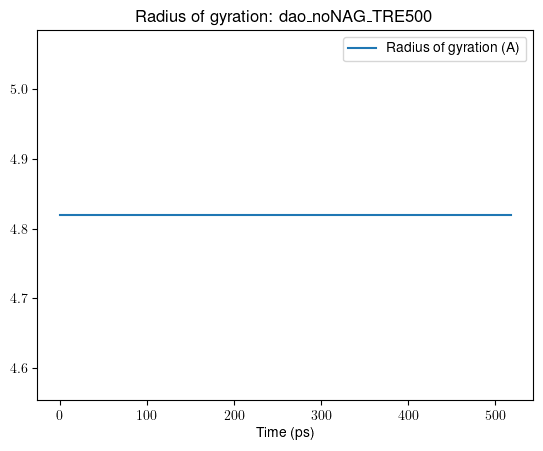

In [472]:
%matplotlib inline

rgyr_df.plot(title='Radius of gyration: '+name)
plt.savefig('../text/figures/'+name+'RG.png')


now run a complete RMSD plot

The resultsdir are stored in the `.rmsd` attribute. This is an array with the shape `(n_frames, 2 + n_selections)`.

In [473]:
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone')
rmsd_analysis.run()
rmsd_analysis.results.rmsd.shape
print(rmsd_analysis.rmsd.shape)

rmsd_df = pd.DataFrame(rmsd_analysis.results.rmsd,
                       columns=['Frame', 'Time (ps)', 'Backbone'])
rmsd_df = rmsd_df[['Time (ps)', 'Backbone']]
rmsd_df.to_csv(dataframedir+name+'RMSD.csv',index=False)
rmsd_df.head()



(260, 3)


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


,Time (ps),Backbone
0,0.0,0.000002
1,2.0,0.559214
2,4.0,0.576970
3,6.0,0.647467
4,8.0,0.675497


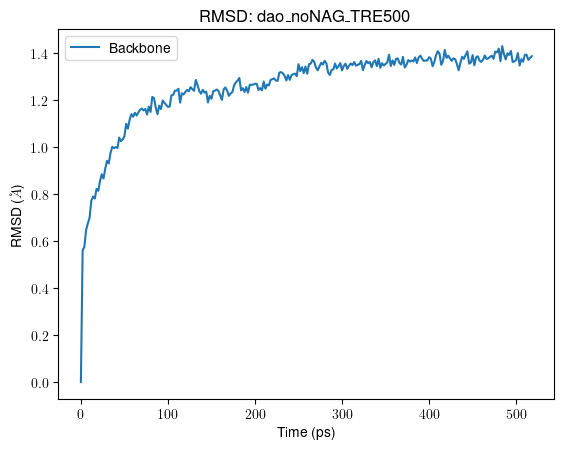

In [474]:
ax = rmsd_df.plot(title='RMSD: '+name,x='Time (ps)', y=['Backbone'],kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')
plt.savefig('../text/figures/'+name+'RMSD.png')

# Fast processing of output with `process_mdout.perl`

plot a collection of graphs to check the process of the calculation


<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v5/vwzdch316vzcj9qldllr58800000gp/T/ipykernel_20068/2634534306.py:26: SyntaxWarning: invalid escape sequence '\s'
  temp_df = pd.read_csv("summary."+key,names=colnames,sep='\s+',index_col=None)


{'DENSITY': '$\\rho$', 'EKCMT': 'E_k CMT / kcal mol$^-1$', 'EKTOT': 'E_k / kcal mol$-1$', 'EPTOT': 'E_p / kcal mol$-1$', 'ESCF': 'ESCF', 'ETOT': 'E_tot / kcal mol$-1$', 'PRES': 'PRESS', 'TEMP': 'T / K', 'TSOLUTE': 'T / K', 'TSOLVENT': 'T / K'}
EKTOT E_k / kcal mol$-1$
   Time (ps)       EKTOT
0       20.2  90439.4412
1       20.4  90173.0812
2       20.6  90285.8333
3       20.8  90416.9375
4       21.0  90512.4445
EPTOT E_p / kcal mol$-1$
   Time (ps)        EPTOT
0       20.2 -673420.0994
1       20.4 -673374.1800
2       20.6 -673885.1522
3       20.8 -674319.3858
4       21.0 -674631.5341
ETOT E_tot / kcal mol$-1$
   Time (ps)         ETOT
0       20.2 -582980.6582
1       20.4 -583201.0989
2       20.6 -583599.3189
3       20.8 -583902.4483
4       21.0 -584119.0896
PRES PRESS
   Time (ps)   PRES
0       20.2 -339.3
1       20.4 -282.0
2       20.6 -167.7
3       20.8 -175.4
4       21.0 -120.9
TEMP T / K
   Time (ps)    TEMP
0       20.2  301.15
1       20.4  300.26
2       20.6 

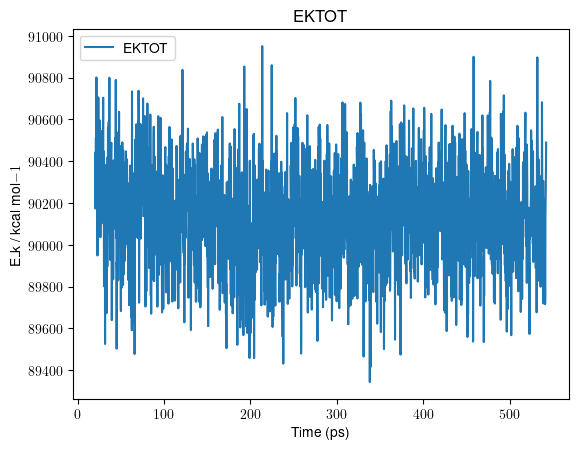

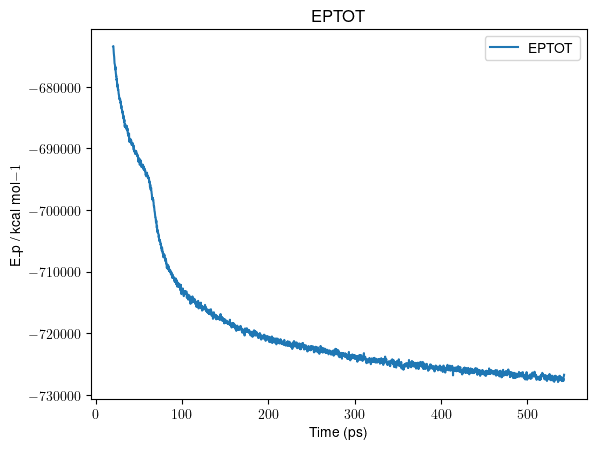

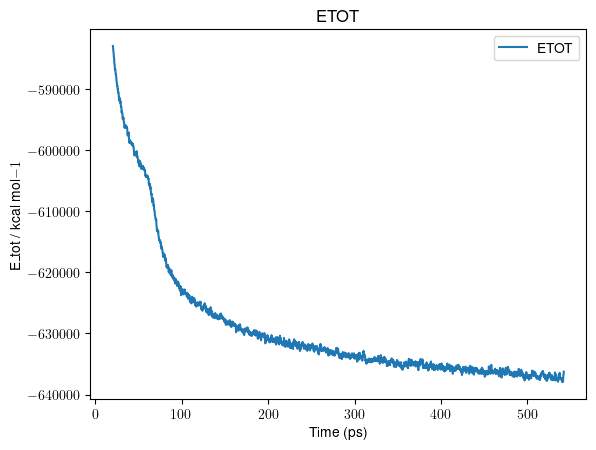

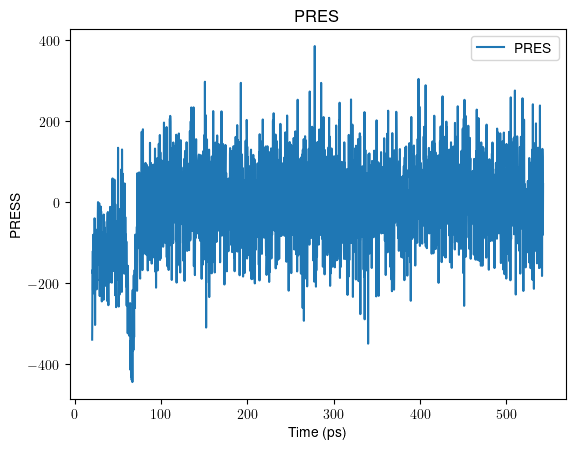

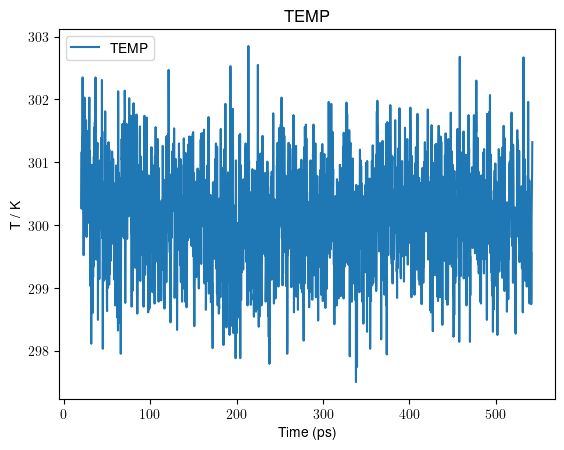

In [475]:
import sys
# assign dataset names
data = {'DENSITY':r'$\rho$',
        'EKCMT':r'E_k CMT / kcal mol$^-1$',
        'EKTOT':r'E_k / kcal mol$-1$',
        'EPTOT':r'E_p / kcal mol$-1$',
        'ESCF':r'ESCF',
        'ETOT':r'E_tot / kcal mol$-1$',
        'PRES':r'PRESS',
        'TEMP':r'T / K',
        'TSOLUTE':r'T / K',
        'TSOLVENT':r'T / K'}#,
#        'VOLUME':r'V / $\AA^3$'}

print(data)
 
# create empty lists
dataframes_list = []
Ylabel_list = []
Title_list = []

# append datasets into the list
for key, value in data.items():
    colnames=['Time (ps)',key]
    #print(colnames)
    temp_df = pd.read_csv("summary."+key,names=colnames,sep='\s+',index_col=None)
    if not temp_df.isnull().values.any():
        print(key,value)
        print(temp_df.head())
   # if temp_df.axes[1] == 1:

        dataframes_list.append(temp_df)
        temp_df.to_csv(dataframedir+name+key+'.csv',index=False)
        Ylabel_list.append(value)
        Title_list.append(key)

for i in range(len(dataframes_list)):
    print(i,data[colnames[1]]+': '+name,)
    dataframes_list[i].plot(x=colnames[0],y=Title_list[i])
    plt.ylabel(Ylabel_list[i])
    plt.title(Title_list[i])
    plt.savefig('../text/figures/'+name+Title_list[i]+'.png')